# Understanding and preparing data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)

In [2]:
# defining a path variable for location of file
path = 'D:\\Arjun\\Personal\\MSc. ML and AI\\Machine Learning\\Linear regression assignment\\'

In [3]:
# reading data and storing it in a DataFrame named df
df = pd.read_csv(path + 'CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

All the columns have same number of data points. Hence there is not need for dealing with any kind of missing values.

In [6]:
# Getting car names form as a separate column
df['company_name'] = df['CarName'].str.split(' ',1)
df['company_name'] = df['company_name'].apply(lambda x:"".join(x[0:1]))
# correcting the spelling mistakes in car name
df['company_name']= df['company_name'].replace(regex={'maxda':'mazda','Nissan':'nissan','toyouta':'toyota','vokswagen':'volkswagen','porcshce':'porsche'})

In [7]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


In [8]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

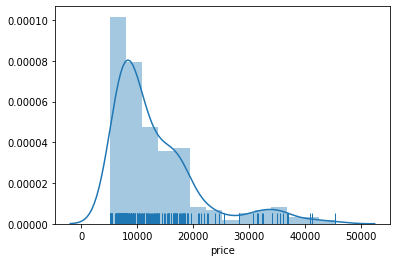

In [9]:
sns.distplot(df['price'], hist = True, rug=True)

### Derived metrics
Creating a derived metric named price segment. The catagories in this variable are:
        - low range: low range segment means cars below $10000. Particularly targeted for low budget customers.
    - medium range: medium range segment means cars between $10001 and $30000. These are targetted for customers wanting for more features but at too high cost.
    - high range: high range segment are cars above $30000. These are targetted for rich people who can afford paying higher for best beatures available for any model.

In [10]:
df['price_segment']=pd.cut(x=df['price'],bins=[0,10000, 30000, 100000], labels=['low range', 'medium range', 'high range'])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,price_segment
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,medium range
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,medium range
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,medium range
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,medium range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,medium range
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,medium range
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,medium range
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,medium range
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,medium range
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,medium range


In [11]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [12]:
df['cylindernumber'] = df['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

# Continuous variable
Analyzing the correlation between continuous variables
But first we need to convert symboling to categorical variable

In [13]:
df['symboling']=df['symboling'].astype(str)

In [14]:
cor = df.corr()
cor

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


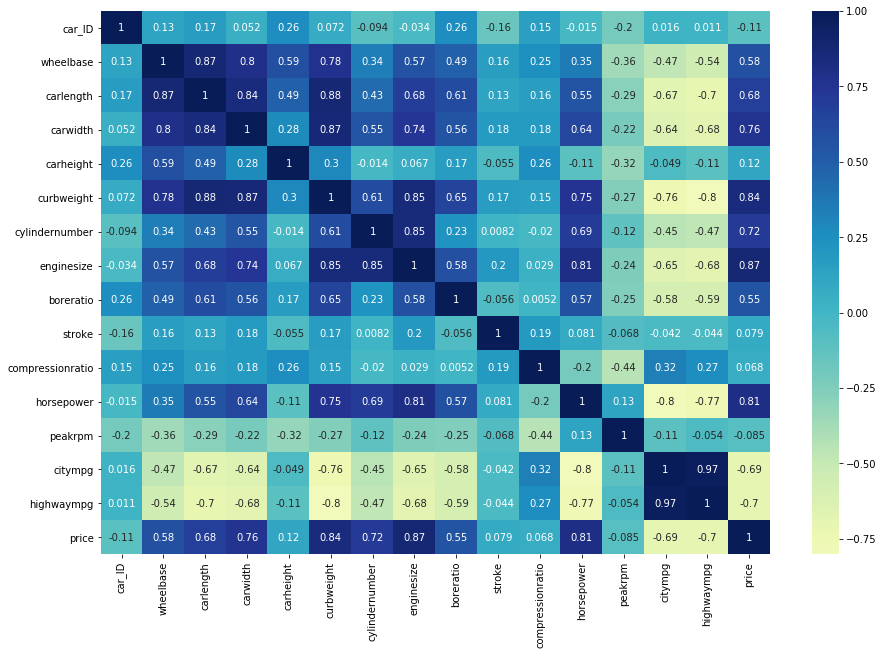

In [15]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(cor, center=0,annot=True, cmap="YlGnBu")

Here we see that price has a high correlation with the folowing continuous variable:
    - wheelbase
    - carlength
    - carwidth
    - curbweight
    - enginesize
    - boreratio
    - horsepower
    - citympg
    - highwaympg
However, citympg and highwaympg has a high correlation hence only one can be used to build model.  
Also horsepower and enginesize has a high correlation hence only one can be used to build model

# Categorical variables
Viewing relationships between categorical variable and continuous variables

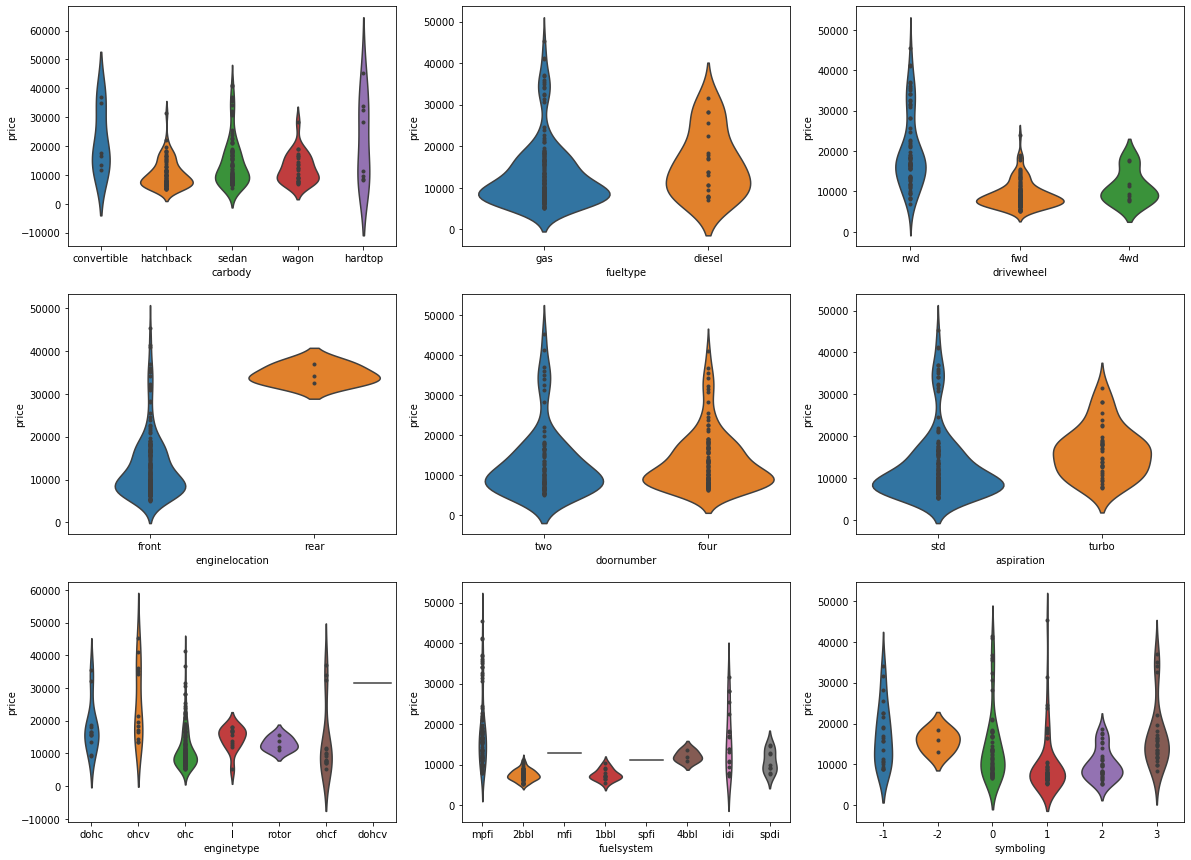

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.violinplot(x = 'carbody', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,2)
sns.violinplot(x = 'fueltype', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,3)
sns.violinplot(x = 'drivewheel', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,4)
sns.violinplot(x = 'enginelocation', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,5)
sns.violinplot(x = 'doornumber', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,6)
sns.violinplot(x = 'aspiration', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,7)
sns.violinplot(x = 'enginetype', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,8)
sns.violinplot(x = 'fuelsystem', y = 'price', data = df, inner = 'point')
plt.subplot(3,3,9)
sns.violinplot(x = 'symboling', y = 'price', data = df, inner = 'point')
plt.show()

It seems that enginelocation and cylindernumber clearly has an impact on car price. Hence, creating dumy variables for only these features and dropping all orhter features

In [17]:
# Creating a list of variable that are not ordinal. Hence, need to create dummy variables for them
dummy_needed =['enginelocation','carbody','price_segment','aspiration']
# creating dummy variable for these variables
df2 = pd.get_dummies(df[dummy_needed],drop_first=True)
df2

,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_segment_medium range,price_segment_high range,aspiration_turbo
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0
5,0,0,0,1,0,1,0,0
6,0,0,0,1,0,1,0,0
7,0,0,0,0,1,1,0,0
8,0,0,0,1,0,1,0,1
9,0,0,1,0,0,1,0,1


In [18]:
# merging the two dataframes and dropping the original categorical variable
df=pd.concat([df,df2],axis=1)
df=df.drop(dummy_needed,axis=1)
df

,car_ID,symboling,CarName,fueltype,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_segment_medium range,price_segment_high range,aspiration_turbo
0,1,3,alfa-romero giulia,gas,two,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,two,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,two,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,0,0,1,0,0,1,0,0
3,4,2,audi 100 ls,gas,four,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,0,0,0,1,0,1,0,0
4,5,2,audi 100ls,gas,four,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,0,0,0,1,0,1,0,0
5,6,2,audi fox,gas,two,fwd,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,0,0,0,1,0,1,0,0
6,7,1,audi 100ls,gas,four,fwd,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,0,0,0,1,0,1,0,0
7,8,1,audi 5000,gas,four,fwd,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,0,0,0,0,1,1,0,0
8,9,1,audi 4000,gas,four,fwd,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,0,0,0,1,0,1,0,1
9,10,0,audi 5000s (diesel),gas,two,4wd,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,0,0,1,0,0,1,0,1


In [19]:
# dropping variables that are not needed
df=df.drop(['CarName','car_ID','fueltype','drivewheel','doornumber','enginetype','fuelsystem','symboling','company_name'],axis=1)
df

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_segment_medium range,price_segment_high range,aspiration_turbo
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,13495.000,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,16500.000,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.470,9.00,154,5000,19,26,16500.000,0,0,1,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.400,10.00,102,5500,24,30,13950.000,0,0,0,1,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.400,8.00,115,5500,18,22,17450.000,0,0,0,1,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.400,8.50,110,5500,19,25,15250.000,0,0,0,1,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.400,8.50,110,5500,19,25,17710.000,0,0,0,1,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.400,8.50,110,5500,19,25,18920.000,0,0,0,0,1,1,0,0
8,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.400,8.30,140,5500,17,20,23875.000,0,0,0,1,0,1,0,1
9,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.400,7.00,160,5500,16,22,17859.167,0,0,1,0,0,1,0,1


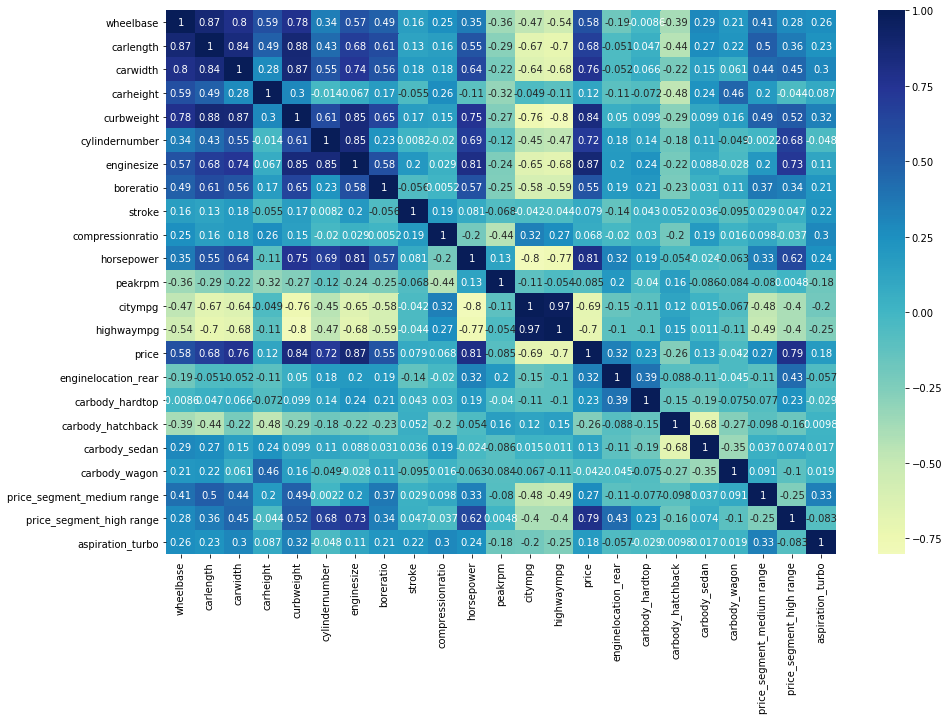

In [20]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(df.corr(), center=0,annot=True, cmap="YlGnBu")

### Splitting the data into train test datasets

In [21]:
df_train, df_test = train_test_split(df,train_size = 0.7,test_size=0.3, random_state=100)

In [22]:
#df_train.shape
df_test.shape

(62, 23)

## Rescaling the data
Using min max scaling for scaling the data

In [23]:
scaler = MinMaxScaler()

In [24]:
var_list = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke', 'compressionratio','horsepower','peakrpm','citympg', 'highwaympg','price','cylindernumber']
df_train[var_list]=scaler.fit_transform(df_train[var_list])

C:\Users\manish.salvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\manish.salvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df_train

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_segment_medium range,price_segment_high range,aspiration_turbo
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.150000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.156250,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.125000,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.031250,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,1,1,0,1
190,0.272414,0.400000,0.308333,0.318584,0.284329,0.2,0.181132,0.404762,0.611111,0.093750,0.175000,0.551020,0.305556,0.324324,0.134321,0,0,1,0,0,0,0,0
96,0.272414,0.393496,0.291667,0.592920,0.187355,0.2,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.065779,0,0,0,1,0,0,0,0
177,0.544828,0.560976,0.516667,0.539823,0.376261,0.2,0.230189,0.500000,0.681818,0.106250,0.183333,0.020408,0.388889,0.405405,0.169351,0,0,1,0,0,1,0,0
181,0.617241,0.759350,0.516667,0.557522,0.645074,0.4,0.377358,0.468254,0.585859,0.137500,0.450000,0.428571,0.166667,0.189189,0.293726,0,0,0,0,1,1,0,0
97,0.272414,0.473171,0.291667,0.504425,0.212956,0.2,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.079592,0,0,0,0,1,0,0,0


### Dividing the dataset into X train and Y train

In [26]:
Y_train = df_train.pop('price')
X_train = df_train

# Using bottom up approach for feature selection

In [27]:
X_train1 = sm.add_constant(X_train['citympg'])
lm1 = sm.OLS(Y_train,X_train1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.68e-20
Time:                        22:05:38   Log-Likelihood:                 60.303
No. Observations:                 143   AIC:                            -116.6
Df Residuals:                     141   BIC:                            -110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4882      0.028     17.329      0.000       0.433       0.544
citympg       -0.7812      0.072    -10.842      0.000      -0.924      -0.639
==============================================================================
Omnibus:                       37.824   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.928
Skew:                           1.392   Prob(JB):                     2.64e-13
Kurtosis:                       4.404   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding enginesize

In [28]:
X_train2 = sm.add_constant(X_train[['citympg','enginesize']])
lm2 = sm.OLS(Y_train,X_train2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     249.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.70e-47
Time:                        22:05:39   Log-Likelihood:                 125.55
No. Observations:                 143   AIC:                            -245.1
Df Residuals:                     140   BIC:                            -236.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0576      0.035      1.657      0.100      -0.011       0.126
citympg       -0.2479      0.059     -4.213      0.000      -0.364      -0.132
enginesize     1.0234      0.071     14.446      0.000       0.883       1.163
==============================================================================
Omnibus:                       17.716   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.208
Skew:                           0.696   Prob(JB):                     5.54e-06
Kurtosis:                       4.457   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# calculating VIF of variables
X_train1_VIF = X_train2.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train1_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,citympg,1.51
1,enginesize,1.51


#### Both these variables has a low p value nad low VIF. Hence both these variables explain the model well.  
Adding few more variables to check the model

In [30]:
X_train3 = sm.add_constant(X_train[['citympg','enginesize','cylindernumber']])
lm3 = sm.OLS(Y_train,X_train3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.93e-46
Time:                        22:05:39   Log-Likelihood:                 126.27
No. Observations:                 143   AIC:                            -244.5
Df Residuals:                     139   BIC:                            -232.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0629      0.035      1.797      0.075      -0.006       0.132
citympg           -0.2295      0.061     -3.777      0.000      -0.350      -0.109
enginesize         1.1472      0.126      9.122      0.000       0.898       1.396
cylindernumber    -0.1723      0.145     -1.190      0.236      -0.459       0.114
==============================================================================
Omnibus:                       16.228   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.922
Skew:                           0.672   Prob(JB):                     2.86e-05
Kurtosis:                       4.306   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# calculating VIF of variables
X_train3_VIF = X_train3.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train3_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylindernumber,20.39
1,enginesize,15.48
0,citympg,2.53


Cylindernumber and enginesize has high colinearity. Hence only taking one of these

In [32]:
X_train4 = sm.add_constant(X_train[['citympg','cylindernumber']])
lm4 = sm.OLS(Y_train,X_train4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.01e-33
Time:                        22:05:40   Log-Likelihood:                 92.730
No. Observations:                 143   AIC:                            -179.5
Df Residuals:                     140   BIC:                            -170.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1823      0.041      4.458      0.000       0.101       0.263
citympg           -0.5353      0.064     -8.386      0.000      -0.662      -0.409
cylindernumber     0.9197      0.103      8.963      0.000       0.717       1.123
==============================================================================
Omnibus:                       35.657   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.659
Skew:                           1.244   Prob(JB):                     4.97e-13
Kurtosis:                       4.822   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# calculating VIF of variables
X_train4_VIF = X_train4.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train4_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,citympg,1.99
1,cylindernumber,1.99


### Keeping enginesize in place of cylindernumber

In [34]:
X_train2 = sm.add_constant(X_train[['citympg','enginesize']])
lm2 = sm.OLS(Y_train,X_train2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     249.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.70e-47
Time:                        22:05:40   Log-Likelihood:                 125.55
No. Observations:                 143   AIC:                            -245.1
Df Residuals:                     140   BIC:                            -236.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0576      0.035      1.657      0.100      -0.011       0.126
citympg       -0.2479      0.059     -4.213      0.000      -0.364      -0.132
enginesize     1.0234      0.071     14.446      0.000       0.883       1.163
==============================================================================
Omnibus:                       17.716   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.208
Skew:                           0.696   Prob(JB):                     5.54e-06
Kurtosis:                       4.457   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding curbweight

In [35]:
X_train3 = sm.add_constant(X_train[['citympg','enginesize','curbweight']])
lm3 = sm.OLS(Y_train,X_train3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.66e-49
Time:                        22:05:40   Log-Likelihood:                 134.22
No. Observations:                 143   AIC:                            -260.4
Df Residuals:                     139   BIC:                            -248.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0628      0.043     -1.445      0.151      -0.149       0.023
citympg       -0.1066      0.065     -1.644      0.102      -0.235       0.022
enginesize     0.6864      0.104      6.600      0.000       0.481       0.892
curbweight     0.3754      0.089      4.233      0.000       0.200       0.551
==============================================================================
Omnibus:                       31.779   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.286
Skew:                           0.930   Prob(JB):                     5.47e-16
Kurtosis:                       5.888   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# calculating VIF of variables
X_train3_VIF = X_train3.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train3_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,14.69
1,enginesize,13.66
0,citympg,1.63


### curbweight and enginesize are related. Hence dropping curbweight

In [37]:
X_train3 = sm.add_constant(X_train[['citympg','enginesize']])
lm3 = sm.OLS(Y_train,X_train3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     249.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.70e-47
Time:                        22:05:41   Log-Likelihood:                 125.55
No. Observations:                 143   AIC:                            -245.1
Df Residuals:                     140   BIC:                            -236.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0576      0.035      1.657      0.100      -0.011       0.126
citympg       -0.2479      0.059     -4.213      0.000      -0.364      -0.132
enginesize     1.0234      0.071     14.446      0.000       0.883       1.163
==============================================================================
Omnibus:                       17.716   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.208
Skew:                           0.696   Prob(JB):                     5.54e-06
Kurtosis:                       4.457   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### adding engine aspiration_turbo

In [38]:
X_train4 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo']])
lm4 = sm.OLS(Y_train,X_train4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.56e-46
Time:                        22:05:41   Log-Likelihood:                 127.65
No. Observations:                 143   AIC:                            -247.3
Df Residuals:                     139   BIC:                            -235.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0415      0.035      1.177      0.241      -0.028       0.111
citympg             -0.2270      0.059     -3.841      0.000      -0.344      -0.110
enginesize           1.0262      0.070     14.643      0.000       0.888       1.165
aspiration_turbo     0.0454      0.022      2.036      0.044       0.001       0.089
==============================================================================
Omnibus:                       19.715   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.634
Skew:                           0.720   Prob(JB):                     3.67e-07
Kurtosis:                       4.704   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# calculating VIF of variables
X_train4_VIF = X_train4.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train4_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.68
0,citympg,1.52
2,aspiration_turbo,1.21


### Adding carbody type variables to model

In [40]:
X_train5 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo','carbody_sedan']])
lm5 = sm.OLS(Y_train,X_train5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.31e-46
Time:                        22:05:42   Log-Likelihood:                 128.56
No. Observations:                 143   AIC:                            -247.1
Df Residuals:                     138   BIC:                            -232.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0398      0.035      1.131      0.260      -0.030       0.109
citympg             -0.2374      0.059     -3.993      0.000      -0.355      -0.120
enginesize           1.0042      0.072     13.983      0.000       0.862       1.146
aspiration_turbo     0.0436      0.022      1.957      0.052      -0.000       0.088
carbody_sedan        0.0230      0.017      1.328      0.186      -0.011       0.057
==============================================================================
Omnibus:                       19.692   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.981
Skew:                           0.729   Prob(JB):                     5.09e-07
Kurtosis:                       4.655   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_train5 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo','carbody_hatchback']])
lm5 = sm.OLS(Y_train,X_train5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     130.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.33e-46
Time:                        22:05:42   Log-Likelihood:                 128.67
No. Observations:                 143   AIC:                            -247.3
Df Residuals:                     138   BIC:                            -232.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0559      0.037      1.527      0.129      -0.016       0.128
citympg              -0.2291      0.059     -3.890      0.000      -0.346      -0.113
enginesize            1.0063      0.071     14.125      0.000       0.865       1.147
aspiration_turbo      0.0450      0.022      2.025      0.045       0.001       0.089
carbody_hatchback    -0.0256      0.018     -1.411      0.161      -0.062       0.010
==============================================================================
Omnibus:                       20.873   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.845
Skew:                           0.752   Prob(JB):                     1.22e-07
Kurtosis:                       4.756   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X_train5 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo','peakrpm']])
lm5 = sm.OLS(Y_train,X_train5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.47e-46
Time:                        22:05:43   Log-Likelihood:                 129.11
No. Observations:                 143   AIC:                            -248.2
Df Residuals:                     138   BIC:                            -233.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0224      0.052     -0.435      0.664      -0.124       0.080
citympg             -0.1826      0.064     -2.840      0.005      -0.310      -0.055
enginesize           1.0851      0.078     13.933      0.000       0.931       1.239
aspiration_turbo     0.0534      0.023      2.360      0.020       0.009       0.098
peakrpm              0.0825      0.049      1.689      0.094      -0.014       0.179
==============================================================================
Omnibus:                       15.655   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.381
Skew:                           0.600   Prob(JB):                     1.38e-05
Kurtosis:                       4.522   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Peakrpm is also insignificant

In [43]:
X_train6 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo','carwidth']])
lm6 = sm.OLS(Y_train,X_train6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.48e-49
Time:                        22:05:43   Log-Likelihood:                 136.29
No. Observations:                 143   AIC:                            -262.6
Df Residuals:                     138   BIC:                            -247.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0723      0.043     -1.684      0.094      -0.157       0.013
citympg             -0.1489      0.059     -2.531      0.012      -0.265      -0.033
enginesize           0.8135      0.083      9.768      0.000       0.649       0.978
aspiration_turbo     0.0175      0.022      0.791      0.430      -0.026       0.061
carwidth             0.3105      0.074      4.211      0.000       0.165       0.456
==============================================================================
Omnibus:                       41.115   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.380
Skew:                           1.148   Prob(JB):                     2.16e-23
Kurtosis:                       6.500   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# calculating VIF of variables
X_train6_VIF = X_train6.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train6_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carwidth,12.85
1,enginesize,8.85
0,citympg,2.22
2,aspiration_turbo,1.40


In [45]:
X_train6 = sm.add_constant(X_train[['citympg','enginesize','aspiration_turbo']])
lm6 = sm.OLS(Y_train,X_train6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.56e-46
Time:                        22:05:43   Log-Likelihood:                 127.65
No. Observations:                 143   AIC:                            -247.3
Df Residuals:                     139   BIC:                            -235.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0415      0.035      1.177      0.241      -0.028       0.111
citympg             -0.2270      0.059     -3.841      0.000      -0.344      -0.110
enginesize           1.0262      0.070     14.643      0.000       0.888       1.165
aspiration_turbo     0.0454      0.022      2.036      0.044       0.001       0.089
==============================================================================
Omnibus:                       19.715   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.634
Skew:                           0.720   Prob(JB):                     3.67e-07
Kurtosis:                       4.704   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# calculating VIF of variables
X_train6_VIF = X_train6.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train6_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.68
0,citympg,1.52
2,aspiration_turbo,1.21


# Residual analysis of train data

Text(0.5, 0, 'Errors')

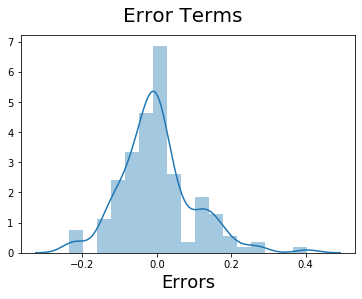

In [47]:
Y_train_predict = lm6.predict(X_train6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_predict))
fig.suptitle('Error Terms', fontsize = 20)            
plt.xlabel('Errors', fontsize = 18)

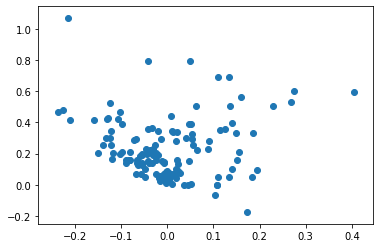

In [48]:
residual = Y_train - Y_train_predict
plt.scatter(residual,Y_train_predict)

Residuals do not seem to have any kind of relationship. Hence we can say that the model satisfies the assumption of linear regression

## Testing the model on test data

In [49]:
variable=['citympg','enginesize','aspiration_turbo']

In [50]:
df_test[variable]

,citympg,enginesize,aspiration_turbo
160,38,98,0
186,27,109,0
59,26,122,0
165,26,98,0
140,26,108,0
64,26,122,0
198,17,130,1
75,19,140,1
172,24,146,0
104,19,181,0


In [51]:
df_test[var_list] = scaler.transform(df_test[var_list])

C:\Users\manish.salvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\manish.salvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Dividing into X_test and Y_test

In [52]:
Y_test = df_test.pop('price')
X_test = df_test

In [55]:
X_test6 = X_test[variable]
X_test6 = sm.add_constant(X_test6)
X_test6

,const,citympg,enginesize,aspiration_turbo
160,1.0,0.694444,0.139623,0
186,1.0,0.388889,0.181132,0
59,1.0,0.361111,0.230189,0
165,1.0,0.361111,0.139623,0
140,1.0,0.361111,0.177358,0
64,1.0,0.361111,0.230189,0
198,1.0,0.111111,0.260377,1
75,1.0,0.166667,0.298113,1
172,1.0,0.305556,0.320755,0
104,1.0,0.166667,0.452830,0


## Predicting on test dataset

In [56]:
Y_test_predict = lm6.predict(X_test6)

## Evaluating the model

Text(0, 0.5, 'y_pred')

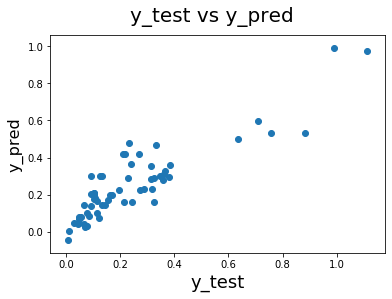

In [57]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(Y_test, Y_test_predict)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [58]:
from sklearn.metrics import r2_score

In [60]:
r2 = r2_score(Y_test,Y_test_predict)
print(round(r2,3))

0.793


The car price can be explained as:
Price = 0.0415 + (-0.2270)*citympg + 1.0262*enginesize + 0.0454*aspiration_turbo